### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

### Import the Cleaned Training Data from EDA

In [2]:
path = '../datasets/train_clean.csv'
train = pd.read_csv(path)

In [3]:
numeric_features = ['lot_frontage', 'overall_qual', 'year_built', 'year_remod/add', 'mas_vnr_area', 
                    'bsmtfin_sf_1', 'total_bsmt_sf', '1st_flr_sf', 'gr_liv_area', 'full_bath', 'totrms_abvgrd', 
                    'fireplaces', 'garage_cars', 'garage_area', 'wood_deck_sf', 'open_porch_sf']

In [4]:
categorical_features = ['lot_regular', 'more_than_1story', 'exter_ex', 'foundation_PConc', 'bsmt_ex', 
                        'has_bsmt_exposure', 'heating_ex', 'kitchen_ex', 'garage_finish_dum', 
                        'has_central_air', 'bsmtfin_type_GLQ', 'neighborhood_code_2', 'neighborhood_code_3',
                       'neighborhood_code_4']

---
### Preparing Testing Set for Prediction

#### Importing the Testing Data

In [5]:
test_path = '../datasets/test.csv'  # assign the path of the training dataset 
test = pd.read_csv(test_path, keep_default_na=False, na_values=['']) 
# load csv. and assign it to a DataFrame called train
# feed in the default Na(s) and only only empty string will count as NaN

test.columns = test.columns.str.lower() # change all column names to lowercase
test.columns = test.columns.str.replace(' ', '_') # replace ' ' to '_' for all column names 

#### Preprocessing

**Numeric Variables**

In [6]:
# define a function to fill NaNs with mean
def mean_for_nan(data, row_list):
    for row in row_list:
        data[row].fillna(value=data[row].mean(), inplace=True)

In [7]:
mean_for_nan(test, numeric_features)

**Categorical Variables**

In [8]:
# define a categorical_pre function to preprocess the selected categorical feature all at once
# this would be helpful when we process the testing data

def ex_qual(row):
    row = str(row)
    if row=='Ex':
        return 1
    else: 
        return 0

In [9]:
# using the 'saleprice' quantiles to group the neighborhood to create new variables
neighborhood_dict = {
    'StoneBr': 1,
    'NridgHt': 1,
    'NoRidge': 1,
    'GrnHill': 1,
    'Veenker': 1,
    'Timber' : 1,
    'Somerst': 1,
    'ClearCr': 1,
    'Crawfor': 2,
    'CollgCr': 2,
    'Blmngtn': 2,
    'NWAmes': 2,
    'Gilbert': 2,
    'Greens': 2,
    'SawyerW': 2, 
    'Mitchel': 2,
    'NAmes': 3,
    'Blueste': 3,
    'NPkVill': 3,
    'Sawyer': 3,
    'Landmrk': 3,
    'SWISU': 3,
    'Edwards': 3,
    'BrkSide': 4,
    'OldTown': 4,
    'BrDale': 4,
    'IDOTRR': 4,
    'MeadowV': 4
}

In [10]:
def categorical_pre(df):
    # create 'lot_regular' based on 'lot_shape'j
    df['lot_regular'] = df['lot_shape'].map(lambda row: 1 if row=='Reg' else 0)
    # create 'more_than_1story' based on 'house_style'
    df['more_than_1story'] = df['house_style'].map(lambda row: 0 if row=='1Story' else 1)
    # create 'foundation_PConc' based on 'foundation' 
    df['foundation_PConc'] = df['foundation'].map(lambda row: 1 if row=='PConc' else 0)
    # create 'has_bsmt_exposure' based on 'bsmt_exposure'
    df['has_bsmt_exposure'] = df['bsmt_exposure'].map(lambda row: 0 if row=='No' else 1)
    # create 'bsmtfin_type_GLQ' based on 'bsmtfin_type_1'
    df['bsmtfin_type_GLQ'] = df['bsmtfin_type_1'].map(lambda row: 1 if row=='GLQ' else 0)
    # create 'has_central_air' based on 'central_air'
    df['has_central_air'] = df['central_air'].map(lambda row: 1 if row=='Y' else 0)
    # create 'garage_finish_dum' based on 'garagre_finish'
    df['garage_finish_dum'] = df['garage_finish'].map(lambda row: 0 if row=='Unf' else 1)
    # create 'exter_ex' based on 'exter_qual'
    df['exter_ex'] = df['exter_qual'].apply(ex_qual)
    # create 'bsmt_ex' based on 'bsmt_qual'
    df['bsmt_ex'] = df['bsmt_qual'].apply(ex_qual)
    # create 'heating_ex' based on 'heating_qc'
    df['heating_ex'] = df['heating_qc'].apply(ex_qual)
    # create 'kitchen_ex' based on 'kitchen_qual'
    df['kitchen_ex'] = df['kitchen_qual'].apply(ex_qual)
    # create neighborhood dummies 
    df['neighborhood_code'] = df['neighborhood'].map(neighborhood_dict)
    df = pd.get_dummies(data=df, columns=['neighborhood_code'], drop_first=True)
    return df

In [11]:
test = categorical_pre(test)

---
### Model 1: Starting with just numeric variables

#### Fitting

In [12]:
# Define X and y
X1 = train[numeric_features]
y = train['log_saleprice']

In [13]:
# train-test-split
X1_train, X1_test, y_train, y_test = train_test_split(X1, y, train_size=0.85, random_state=42)

# instantiate the model  
lr1 = LinearRegression()

# cross validation scores 
print(f'The training score mean is {cross_val_score(estimator=lr1, X=X1_train, y=y_train).mean()}')
print(f'The training score standard deviation is {cross_val_score(estimator=lr1, X=X1_train, y=y_train).std()}')

The training score mean is 0.8124716066448622
The training score standard deviation is 0.06437247960996247


#### Evaluation

In [14]:
# fit the model
lr1.fit(X1_train, y_train)

LinearRegression()

In [15]:
# R-square in training and testing sets
lr1.score(X1_train, y_train), lr1.score(X1_test, y_test)

(0.83681930487346, 0.8439741098999195)

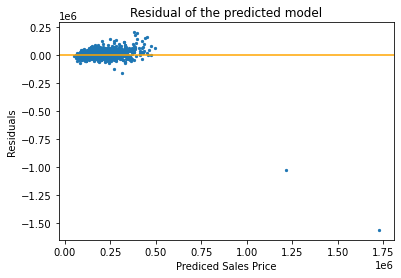

In [16]:
# Calculating the residuals
y_true = train['saleprice']
y_preds_log = lr1.predict(X1)
y_preds = np.exp(y_preds_log)
residuals = y_true - y_preds

# Residual Plots
plt.scatter(y_preds, residuals, s = 5)
plt.title('Residual of the predicted model')
plt.xlabel('Prediced Sales Price')
plt.ylabel('Residuals')
plt.axhline(0, color='orange');

In [17]:
# RMSE 
metrics.mean_squared_error(y_true, y_preds, squared = False)

49040.21227546787

#### Model 1 Prediction (for Kaggle Submission):

In [18]:
features = numeric_features
kaggle_test_subset = test[features]

In [19]:
kaggle_pred_m1 = lr1.predict(kaggle_test_subset)

In [20]:
preds_dict = {
    'Id' : test['id'],
    'Log_SalePrice' : kaggle_pred_m1
}

preds_df_m1 = pd.DataFrame(preds_dict)

In [21]:
preds_df_m1['SalePrice'] = np.exp(preds_df_m1['Log_SalePrice'])
preds_df_m1 = preds_df_m1.drop(columns=['Log_SalePrice'])
# preds_df_m1.to_csv('./datasets/kaggle_preds_m1.csv', index=False, header=True)

### Model 2: PolynomialFeatures (selected numeric only) + LASSO

In [59]:
# Define X and y
X = train[numeric_features]
y = train['log_saleprice']

# Instantiate PolynomialFeatures objects
poly = PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)

# Transform X_train
# Fit and transform our X data.
X_overfit = poly.fit_transform(X)

In [60]:
# Create train/test splits.
X_train, X_test, y_train, y_test = train_test_split(X_overfit, y, test_size=0.85, random_state=42)

In [61]:
# StandardScale data
sc = StandardScaler()
Z_train = sc.fit_transform(X_train)
Z_test = sc.transform(X_test)

In [62]:
# Imports LASSO
from sklearn.linear_model import Lasso, LassoCV

In [76]:
# Set up a list of Lasso alphas to check.
l_alphas = np.logspace(-3, -1, 100)

# Cross-validate over our list of Lasso alphas.
lasso_cv = LassoCV(alphas=l_alphas, cv=5, max_iter=5000)

# Fit model using best ridge alpha!
lasso_cv.fit(Z_train, y_train);

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.008171388238681576, tolerance: 0.0042248409003977925
  model = cd_fast.enet_coordinate_descent(


In [77]:
lasso_cv.score(Z_train, y_train), lasso_cv.score(Z_test, y_test)

(0.9079291653600844, 0.853579168632302)

In [78]:
lasso_cv.alpha_

0.001

In [79]:
lasso_cv.coef_

array([ 0.        ,  0.        ,  0.        ,  0.        , -0.00955125,
        0.08821237,  0.08629348,  0.03105558,  0.04396694, -0.        ,
        0.        ,  0.        ,  0.        , -0.        ,  0.00564639,
        0.        , -0.07481013,  0.        ,  0.        ,  0.00445317,
       -0.        , -0.        , -0.        , -0.        , -0.        ,
       -0.        ,  0.        ,  0.        ,  0.06842955,  0.        ,
       -0.00259524,  0.05822867,  0.        ,  0.06509587,  0.        ,
       -0.        ,  0.        ,  0.0029719 ,  0.        ,  0.        ,
       -0.        ,  0.        ,  0.        ,  0.05424863,  0.03098373,
        0.        ,  0.0036166 ,  0.        ,  0.04350569, -0.        ,
        0.        ,  0.        ,  0.        ,  0.03866342, -0.        ,
        0.        ,  0.        ,  0.        , -0.        ,  0.        ,
        0.        ,  0.04794899, -0.00777336,  0.        ,  0.        ,
        0.        ,  0.05136023, -0.        ,  0.        ,  0.  

#### Model 2 Prediction (for Kaggle Submission):

In [80]:
# Define X and y
features = numeric_features
kaggle_test_subset = test[features]


test_X_overfit = poly.transform(kaggle_test_subset)
test_Z = sc.transform(test_X_overfit)

In [ ]:
kaggle_pred_m2 = lasso_cv.predict(test_Z)

In [ ]:
preds_dict = {
    'Id' : test['id'],
    'Log_SalePrice' : kaggle_pred_m2
}

preds_df_m2 = pd.DataFrame(preds_dict)

In [ ]:
preds_df_m2['SalePrice'] = np.exp(preds_df_m2['Log_SalePrice'])
preds_df_m2 = preds_df_m2.drop(columns=['Log_SalePrice'])
# preds_df_m2.to_csv('./datasets/kaggle_preds_m2.csv', index=False, header=True)

### Model 2.1: PolynomialFeatures (all numeric) + LASSO

In [94]:
train_numerics = train.select_dtypes(include=np.number)

In [95]:
# Define X and y
X = train_numerics.drop(columns=['id', 'pid', 'saleprice', 'log_saleprice'])
y = train['log_saleprice']

# Instantiate PolynomialFeatures objects
poly = PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)

# Transform X_train
# Fit and transform our X data.
X_overfit = poly.fit_transform(X)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [96]:
# Create train/test splits.
X_train, X_test, y_train, y_test = train_test_split(X_overfit, y, test_size=0.85, random_state=42)

In [97]:
# StandardScale data
sc = StandardScaler()
Z_train = sc.fit_transform(X_train)
Z_test = sc.transform(X_test)

In [98]:
# Set up a list of Lasso alphas to check.
l_alphas = np.logspace(-3, 0, 100)

# Cross-validate over our list of Lasso alphas.
lasso_cv = LassoCV(alphas=l_alphas, cv=5, max_iter=5000)

# Fit model using best ridge alpha!
lasso_cv.fit(Z_train, y_train);

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.008171388238681576, tolerance: 0.0042248409003977925
  model = cd_fast.enet_coordinate_descent(


In [99]:
lasso_cv.score(Z_train, y_train), lasso_cv.score(Z_test, y_test)

(0.9079291653600844, 0.853579168632302)

In [100]:
lasso_cv.alpha_

0.001

In [101]:
lasso_cv.coef_

array([ 0.        ,  0.        ,  0.        ,  0.        , -0.00955125,
        0.08821237,  0.08629348,  0.03105558,  0.04396694, -0.        ,
        0.        ,  0.        ,  0.        , -0.        ,  0.00564639,
        0.        , -0.07481013,  0.        ,  0.        ,  0.00445317,
       -0.        , -0.        , -0.        , -0.        , -0.        ,
       -0.        ,  0.        ,  0.        ,  0.06842955,  0.        ,
       -0.00259524,  0.05822867,  0.        ,  0.06509587,  0.        ,
       -0.        ,  0.        ,  0.0029719 ,  0.        ,  0.        ,
       -0.        ,  0.        ,  0.        ,  0.05424863,  0.03098373,
        0.        ,  0.0036166 ,  0.        ,  0.04350569, -0.        ,
        0.        ,  0.        ,  0.        ,  0.03866342, -0.        ,
        0.        ,  0.        ,  0.        , -0.        ,  0.        ,
        0.        ,  0.04794899, -0.00777336,  0.        ,  0.        ,
        0.        ,  0.05136023, -0.        ,  0.        ,  0.  

### Model 3: PolynomialFeatures ((numeric only) + Ridge

In [102]:
from sklearn.linear_model import Ridge, RidgeCV

In [103]:
r_alphas = np.logspace(2, 7, 100)

# Cross-validate over our list of ridge alphas.
ridge_cv = RidgeCV(alphas=r_alphas, scoring='r2', cv=5)

# Fit model using best ridge alpha!
ridge_cv.fit(Z_train, y_train);

In [104]:
ridge_cv.score(Z_train, y_train), ridge_cv.score(Z_test, y_test)

(0.8818846854245219, 0.8541935170534922)

#### Model 3 Prediction (for Kaggle Submission):

In [105]:
kaggle_pred_m3 = ridge_cv.predict(test_Z)

In [106]:
preds_dict = {
    'Id' : test['id'],
    'Log_SalePrice' : kaggle_pred_m3
}

preds_df_m3 = pd.DataFrame(preds_dict)

In [107]:
preds_df_m3['SalePrice'] = np.exp(preds_df_m3['Log_SalePrice'])
preds_df_m3 = preds_df_m3.drop(columns=['Log_SalePrice'])
# preds_df_m3.to_csv('./datasets/kaggle_preds_m3.csv', index=False, header=True)

### Model 4: Adding categorical variables to the model

In [120]:
# try a model with numeric and categorical variables
X2 = train[numeric_features + categorical_features]
y = train['log_saleprice']

# train-test-split
X2_train, X2_test, y_train, y_test = train_test_split(X2, y, train_size=0.85, random_state=42)

# instantiate the model  
lr2 = LinearRegression()

# cross validation scores 
print(f'The training score mean is {cross_val_score(estimator=lr2, X=X2_train, y=y_train).mean()}')
print(f'The training score standard deviation is {cross_val_score(estimator=lr2, X=X2_train, y=y_train).std()}')

The training score mean is 0.8375462991059235
The training score standard deviation is 0.04923732310323296


In [109]:
lr2.fit(X2_train, y_train)
lr2.score(X2_train, y_train), lr2.score(X2_test, y_test)

(0.860720314379243, 0.8577039089238588)

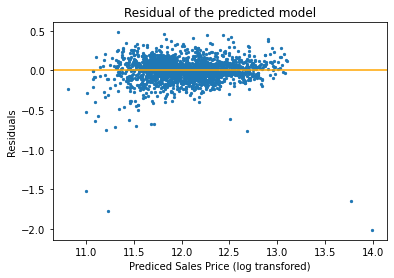

In [110]:
# Calculating the R-squares
y_preds = lr2.predict(X2)
residuals = y - y_preds

# Residual Plots
plt.scatter(y_preds, residuals, s = 5)
plt.title('Residual of the predicted model')
plt.xlabel('Prediced Sales Price (log transfored)')
plt.ylabel('Residuals')
plt.axhline(0, color='orange');

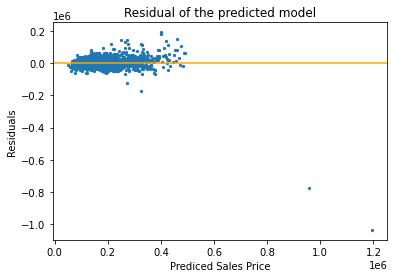

In [111]:
# Calculating the residuals
y_true = train['saleprice']
y_preds_log = lr2.predict(X2)
y_preds = np.exp(y_preds_log)
residuals = y_true - y_preds

# Residual Plots
plt.scatter(y_preds, residuals, s = 5)
plt.title('Residual of the predicted model')
plt.xlabel('Prediced Sales Price')
plt.ylabel('Residuals')
plt.axhline(0, color='orange');

In [112]:
# RMSE is very large because there are outliers in the dataset
metrics.mean_squared_error(y_true, y_preds, squared = False)

37655.34176072821

#### Model 4 Prediction (for Kaggle Submission):

In [113]:
features = numeric_features + categorical_features
kaggle_test_subset = test[features]

In [114]:
kaggle_pred_m4 = lr2.predict(kaggle_test_subset)

In [115]:
preds_dict = {
    'Id' : test['id'],
    'Log_SalePrice' : kaggle_pred_m4
}

preds_df_m4 = pd.DataFrame(preds_dict)

In [116]:
preds_df_m4['SalePrice'] = np.exp(preds_df_m4['Log_SalePrice'])
preds_df_m4 = preds_df_m4.drop(columns=['Log_SalePrice'])
# preds_df_m4.to_csv('./datasets/kaggle_preds_m4_2.csv', index=False, header=True)

**To maximize my training set, I will fit the entire training set to the model.**

In [117]:
# fitting the whole train dataset 
lr2.fit(X2, y)
kaggle_pred_m4_1 = lr2.predict(kaggle_test_subset)
preds_dict = {
    'Id' : test['id'],
    'Log_SalePrice' : kaggle_pred_m4_1
}

preds_df_m4_1 = pd.DataFrame(preds_dict)
preds_df_m4_1['SalePrice'] = np.exp(preds_df_m4_1['Log_SalePrice'])
preds_df_m4_1 = preds_df_m4_1.drop(columns=['Log_SalePrice'])
# preds_df_m4_1.to_csv('./datasets/kaggle_preds_m4_1.csv', index=False, header=True)

### Choosing Model 4 as the Final Model
Based on the R-squared comparison, I chose Model 4 as the final model as the training and testing R-squares are the closest. 


| Model                                               | Training R-square | Testing R-square |
|-----------------------------------------------------|-------------------|------------------|
| Model 1: Linear Regression (numeric variables only) | 0.837             | 0.844            |
| Model 2: LASSO Regularized Regression               | 0.908             | 0.854            |
| Model 3: Ridget Regularized Regression              | 0.882             | 0.854            |
| Model 4: Linear Regression (numeric + categorical)  | 0.861             | 0.858            |


---

### Interpretation (Using OLS Summary for Interpretation)
I decided to use Model 4 as my final model and I will making interpretation here.

In [119]:
import statsmodels.api as sm

In [123]:
# Set up X.

final_features = numeric_features + categorical_features
X = sm.add_constant(train[final_features])

# Set up y.
y = train['log_saleprice']

In [124]:
results = sm.OLS(y, X).fit()

In [126]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          log_saleprice   R-squared:                       0.861
Model:                            OLS   Adj. R-squared:                  0.859
Method:                 Least Squares   F-statistic:                     416.8
Date:                Sat, 06 Mar 2021   Prob (F-statistic):               0.00
Time:                        12:46:05   Log-Likelihood:                 935.43
No. Observations:                2051   AIC:                            -1809.
Df Residuals:                    2020   BIC:                            -1634.
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   7.8582      0.620     12.674      0.000       6.642       9.074
lot_frontage            0.0003      0.000      1.579      0.115   -7.37e-05       0.001
overall_qual            0.0849      0.004     19.159      0.000       0.076       0.094
year_built             -0.0003      0.000     -1.191      0.234      -0.001       0.000
year_remod/add          0.0018      0.000      7.325      0.000       0.001       0.002
mas_vnr_area        -2.134e-05   2.41e-05     -0.885      0.376   -6.86e-05     2.6e-05
bsmtfin_sf_1         6.204e-05   1.09e-05      5.704      0.000    4.07e-05    8.34e-05
total_bsmt_sf        5.868e-05   1.51e-05      3.891      0.000    2.91e-05    8.83e-05
1st_flr_sf          -3.812e-06   2.22e-05     -0.171      0.864   -4.74e-05    3.98e-05
gr_liv_area             0.0002   1.94e-05      9.074      0.000       0.000       0.000
full_bath               0.0067      0.009      0.715      0.475      -0.012       0.025
totrms_abvgrd           0.0075      0.004      1.871      0.061      -0.000       0.015
fireplaces              0.0468      0.007      7.100      0.000       0.034       0.060
garage_cars             0.0459      0.011      4.181      0.000       0.024       0.067
garage_area           3.02e-05   3.84e-05      0.787      0.431   -4.51e-05       0.000
wood_deck_sf         8.274e-05   2.89e-05      2.863      0.004    2.61e-05       0.000
open_porch_sf        1.451e-05   5.69e-05      0.255      0.799   -9.71e-05       0.000
lot_regular            -0.0234      0.008     -3.053      0.002      -0.038      -0.008
more_than_1story       -0.0107      0.013     -0.837      0.403      -0.036       0.014
exter_ex                0.0035      0.024      0.148      0.882      -0.043       0.050
foundation_PConc        0.0028      0.011      0.249      0.804      -0.019       0.025
bsmt_ex                 0.0275      0.016      1.674      0.094      -0.005       0.060
has_bsmt_exposure       0.0186      0.008      2.288      0.022       0.003       0.035
heating_ex              0.0324      0.009      3.708      0.000       0.015       0.050
kitchen_ex              0.0693      0.018      3.855      0.000       0.034       0.105
garage_finish_dum       0.0083      0.009      0.943      0.346      -0.009       0.025
has_central_air         0.1682      0.015     10.939      0.000       0.138       0.198
bsmtfin_type_GLQ        0.0129      0.011      1.232      0.218      -0.008       0.034
neighborhood_code_2    -0.0597      0.011     -5.380      0.000      -0.081      -0.038
neighborhood_code_3    -0.1096      0.015     -7.485      0.000      -0.138      -0.081
neighborhood_code_4    -0.2154      0.018    -11.722      0.000      -0.251      -0.179
==============================================================================
Omnibus:    

Interpretation: according to this model, keeping everything else constant: 
- one unit increase in 'lot_frontage' predicts a 0.00023405153299654486 increase in log home price. 
- one unit increase in 'overall_qual' predicts a 0.08153634153329425 increase in log home price.
- one unit increase in 'year_built' predicts a 0.00039356760599383524 decreease in log home price. 
- one unit increase in 'year_remod/add' predicts a 0.001651973181117733 increase in log home price.
- one unit increase in 'mas_vnr_area' predicts a 1.927394957484677e-05 decrease in log home price.
- one unit increase in 'bsmtfin_sf_1' predicts a 5.680868108783392e-05 increase in log home price.
- one unit increase in 'total_bsmt_sf' predicts a 4.59083809558648e-05 increase in log home price.
- one unit increase in '1st_flr_sf' predicts a 2.3736916387243033e-07 increase in log home price.
- one unit increase in 'gr_liv_area' predicts a 0.00015667105670134093 increase in log home price.
- one unit increase in 'full_bath' predict a 0.011264260421729937 increase in log home price.
- one unit increase in 'totrms_abvgrd' predicts a 0.009926626745281986 increase in log home price.
- one unit increase in 'fireplaces' predicts a 0.05085725119585685 increase in log home price.
- one unit increase in 'garage_cars' predicts a 0.04263162909301171 increase in log home price.
- one unit increase in 'garage_area' predicts a 6.135466689437801e-05 increase in log home price.
- one unit increase in 'wood_deck_sf' predicts a 8.782666697582263e-05 increase in log home price. 
- one unit increase in 'open_porch_sf' predicts a 2.884261742460033e-05 increase in log home price.
- lot_regular' has a negative coefficient, indicating that if the lot shape is regular the log home price will decreases by -0.026310955864923876. 
- 'more_than_1story' has a negative coefficient, indicating that having two stories will decrease the log home price by 0.013085402652755023,
- 'exter_ex' indicates that if "the quality of the material on the exterior" is evaluated as 'Excellent' the log home price will increase by 0.010752138169050504.
- 'foundation_PConc' indicates that if the foundation is 'Poured Contrete', the log home price will increase by 0.0006615374649773173. 
- 'bsmt_ex' indicates that if the the height of the basement is evaluated as 'Excellent' the log home price will increase by 0.028623189118306937.
- 'has_bsmt_exposure' indicates that if the basement can walkout or have garden level walls the log home price will increase by 0.015559079385094916. 
- 'heating_ex' indicates that if the heating quality is evaluated as 'Excellent', the log home price will increase by 0.03703786257153914. 
- 'kitchen_ex' indicates that in the kitchen quality is evaluated as 'Excellent' the log home price will increase by 0.06830067418194394.
- 'garage_finish_dum' indicate that if the garage interior is finish, the log home price will increase by 0.01217203929280384. 
- 'has_central_air' indicates that if the home has central air, the log home price will increase by 0.16195792570918355,
- 'bsmtfin_type_GLQ'indicates that if the basement has a rating of 'Good Living Quarters', the log home price will increase by 0.017893451532547497.
- 'neighborhood_code_2' indicates that locating in one of the neighborhood in group 2 (or the 3rd quartile, see above dictionary), the log home price will decrease by 0.06672998370961587. 
- 'neighborhood_code_3' indicates that locating in one of the neighborhood in group 3 (or the 2nd quartile, see above dictionary), the log home price will decrease by 0.12715784323405668,
- 'neighborhood_code_4': ndicates that locating in one of the neighborhood in group 4 (or the 1st quartile, see above dictionary), the log home price will decrease by 0.22629583620466487.